In [ ]:
!!pip install nltk

In [1]:
import requests
import json
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Download NLTK resources (run once)
import nltk

In [2]:
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/maryam/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /Users/maryam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maryam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

https://www.reddit.com/r/wallstreetbets.json

https://www.reddit.com/r/wallstreetbets/comments/1icc42x/what_are_your_moves_tomorrow_january_29_2025.json

In [3]:
main_url = "https://www.reddit.com/r/wallstreetbets.json"

# main_url  = "https://www.reddit.com/r/leetcode.json"

headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(main_url, headers=headers)
data = json.loads(response.text)

comment_url = []

childern = data['data']['children']

for child in childern:
    url_ = "https://www.reddit.com" + child['data']['permalink']
    url_ = url_[:-1] + ".json"
    comment_url.append(url_)



In [4]:
all_text = []

def getData():
    for url in comment_url:
        headers = {'User-Agent': 'Mozilla/5.0'}
        response = requests.get(url, headers=headers)
        data = json.loads(response.text)

        # Get main post title and body
        main_post = data[0]['data']['children'][0]['data']
        all_text.append(main_post['title'])
        all_text.append(main_post['selftext'])

        children = data[1]['data']['children']

        for child in children:
            if 'body' in child.get('data', {}):
                all_text.append(child['data']['body'])
            else:
                print("No 'body' key found. Skipping...")


In [5]:
getData()

No 'body' key found. Skipping...
No 'body' key found. Skipping...
No 'body' key found. Skipping...
No 'body' key found. Skipping...
No 'body' key found. Skipping...
No 'body' key found. Skipping...
No 'body' key found. Skipping...
No 'body' key found. Skipping...
No 'body' key found. Skipping...
No 'body' key found. Skipping...
No 'body' key found. Skipping...
No 'body' key found. Skipping...
No 'body' key found. Skipping...
No 'body' key found. Skipping...
No 'body' key found. Skipping...
No 'body' key found. Skipping...
No 'body' key found. Skipping...


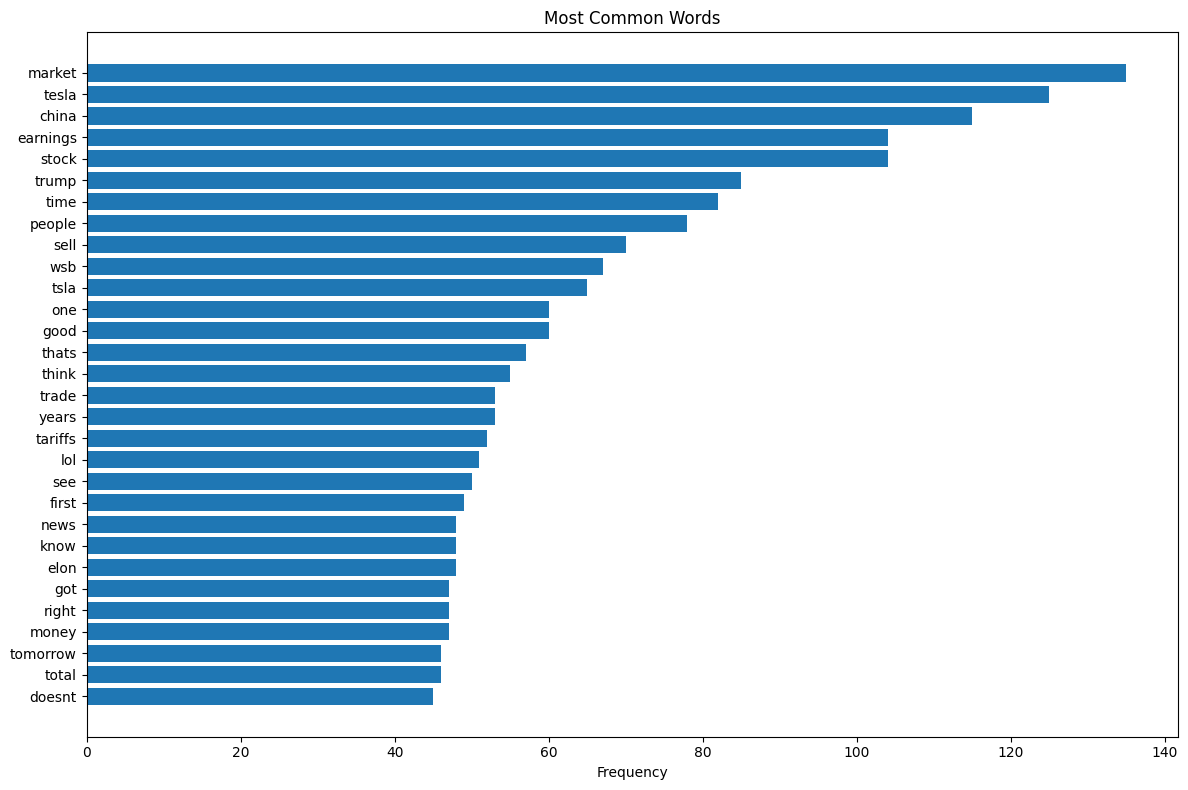

In [6]:
stop_words = set(stopwords.words('english'))

with open("stopwords.txt", 'r') as file:
    additional_stopwords = {line.strip() for line in file}
stop_words.update(additional_stopwords)

word_counts = Counter()

for text in all_text:
    # Clean and tokenize text
    text = re.sub(r'[^\w\s]', '', text.lower())  # Remove punctuation
    words = word_tokenize(text)
    # Filter words
    filtered_words = [
        word for word in words 
        if word.isalpha() 
        and word not in stop_words 
        and len(word) > 2
    ]
    word_counts.update(filtered_words)

top_words = word_counts.most_common(30)

# Visualization
plt.figure(figsize=(12, 8))
words, counts = zip(*top_words)
plt.barh(words[::-1], counts[::-1])  # Reverse to show highest first
plt.xlabel('Frequency')
plt.title('Most Common Words')
plt.tight_layout()
plt.show()